In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/merged_vlp_otd_anonimized.csv')
df.drop(columns={'order_close_date','warehouse','ornum'},inplace= True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269133 entries, 0 to 269132
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   source_id            269133 non-null  int64  
 1   birthday             269133 non-null  object 
 2   month_order          269133 non-null  int64  
 3   year_order           269133 non-null  int64  
 4   city                 269133 non-null  object 
 5   segmento             269133 non-null  object 
 6   gmv_on_3             269133 non-null  float64
 7   active               269133 non-null  bool   
 8   is_graduated         269133 non-null  bool   
 9   is_kam               269133 non-null  bool   
 10  reactivation_status  269133 non-null  object 
 11  microzone_source_id  269133 non-null  float64
 12  deliver_date         269133 non-null  object 
 13  trip_id              269133 non-null  object 
 14  ontime_num           269133 non-null  bool   
 15  payment_method_co

Para un EDA completo, primero obtendré estadísticas descriptivas del dataset. Luego, analizaré la presencia de valores faltantes y finalmente visualizaré algunas de las características más importantes.

In [4]:
# Estadísticas descriptivas
desc_stats = df.describe(include='all', datetime_is_numeric=True)

desc_stats

,source_id,birthday,month_order,year_order,city,segmento,gmv_on_3,active,is_graduated,is_kam,reactivation_status,microzone_source_id,deliver_date,trip_id,ontime_num,payment_method_code,dispatch_warehouse,stop_number,customer_id
count,2.691330e+05,269133,269133.000000,269133.0,269133,269133,269133.000000,269133,269133,269133,269133,269133.000000,269133,269133,269133,269133,269133,269133.000000,269133.000000
unique,NaN,704,NaN,NaN,1,6,NaN,1,2,2,1,NaN,207,27007,2,7,1,NaN,NaN
top,NaN,2020-12-03,NaN,NaN,SPO,Restaurante,NaN,True,True,False,None,NaN,2023-01-27,VLP-230410-019,True,CASH,VLP,NaN,NaN
freq,NaN,1738,NaN,NaN,269133,252107,NaN,269133,166472,217487,269133,NaN,1881,46,253183,96285,269133,NaN,NaN
mean,9.618730e+07,NaN,4.372801,2023.0,NaN,NaN,99.613840,NaN,NaN,NaN,NaN,332.025430,NaN,NaN,NaN,NaN,NaN,6.015167,2382.956516
std,7.416536e+07,NaN,2.315125,0.0,NaN,NaN,97.441685,NaN,NaN,NaN,NaN,360.805259,NaN,NaN,NaN,NaN,NaN,4.216164,1862.688044
min,1.935530e+07,NaN,1.000000,2023.0,NaN,NaN,0.361050,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,3.838312e+07,NaN,2.000000,2023.0,NaN,NaN,41.494720,NaN,NaN,NaN,NaN,120.000000,NaN,NaN,NaN,NaN,NaN,3.000000,870.000000
50%,6.019237e+07,NaN,4.000000,2023.0,NaN,NaN,70.340970,NaN,NaN,NaN,NaN,138.000000,NaN,NaN,NaN,NaN,NaN,5.000000,1932.000000
75%,1.380366e+08,NaN,6.000000,2023.0,NaN,NaN,121.938920,NaN,NaN,NaN,NaN,383.000000,NaN,NaN,NaN,NaN,NaN,8.000000,3544.000000


### Aquí hay algunas observaciones iniciales basadas en las estadísticas descriptivas:

*General:*

1) El conjunto de datos tiene 269,133 registros.
2) La columna year_order tiene un valor único: 2023. Por lo tanto, todos los pedidos pertenecen al mismo año.
3) La columna city también tiene un valor único: SPO. Por lo que todos los registros pertenecen a la misma ciudad.

*Variables Numéricas:*

gmv_on_3 tiene un rango que va desde aproximadamente 0 hasta 6,405.27, con una mediana de 70.34  
stop_number tiene valores que varían de 1 a 33, con una mediana de 5.  

*Variables Categóricas:*  
La columna segmento tiene 6 valores únicos, donde "Restaurante" es el más frecuente  
payment_method_code tiene 7 métodos de pago únicos, siendo "CASH" el más común.  

*Fechas:*  
birthday tiene 704 fechas únicas, siendo "2020-12-03" la más común.  
delivery tiene 207 fechas únicas, con "2023-01-27" como la más común.  

*Datos Faltantes o Valores Únicos:*

Algunas columnas como active, reactivation_status, city, warehouse, y dispatch_warehouse tienen un solo valor único para todos los registros o están vacías.

### A continuación, verificaré si hay valores faltantes en el conjunto de datos y cuántos son para cada columna.

In [5]:
# Verificar valores faltantes
missing_values = df.isnull().sum()

missing_values


source_id              0
birthday               0
month_order            0
year_order             0
city                   0
segmento               0
gmv_on_3               0
active                 0
is_graduated           0
is_kam                 0
reactivation_status    0
microzone_source_id    0
deliver_date           0
trip_id                0
ontime_num             0
payment_method_code    0
dispatch_warehouse     0
stop_number            0
customer_id            0
dtype: int64

Excelente, parece que no hay valores faltantes en ninguna de las columnas del conjunto de datos.

### El siguiente paso es la visualización de datos para entender mejor la distribución y relaciones entre las principales variables.  
Distribución de gmv_on_3.  
Distribución de stop_number.  
Distribución de pedidos por segmento.  
Distribución de métodos de pago en payment_method_code.

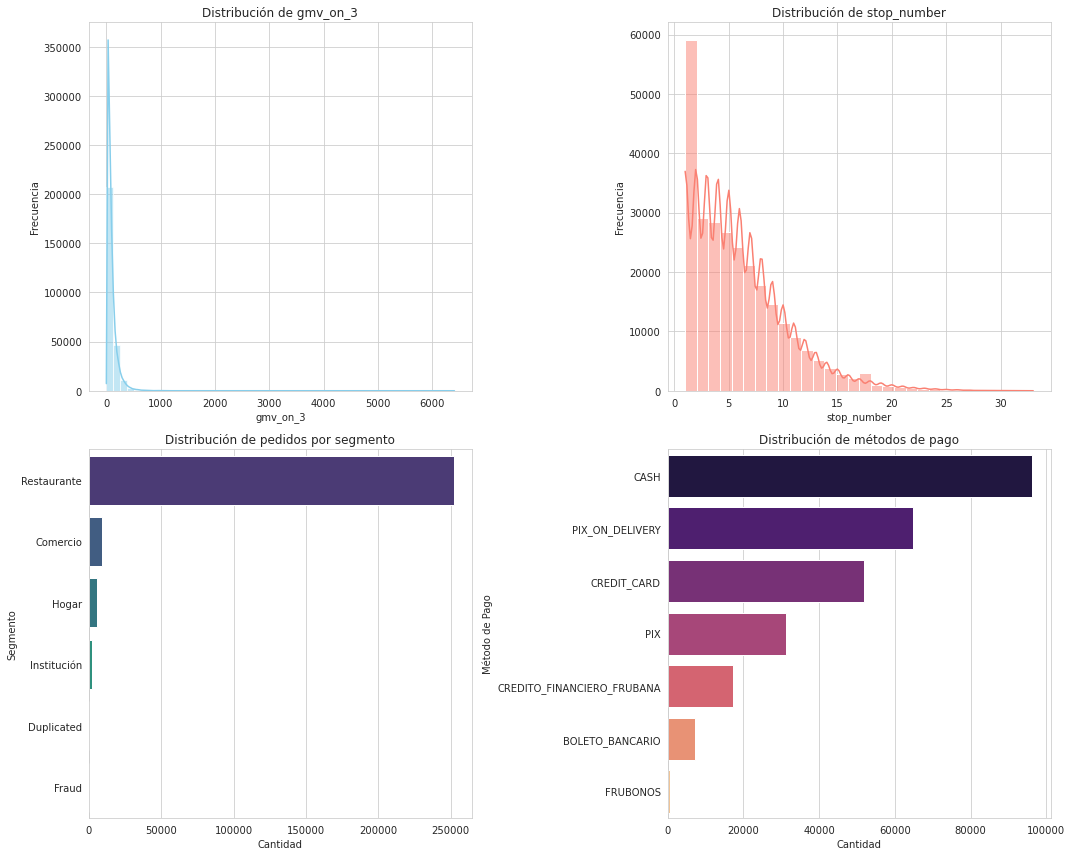

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de visualización
sns.set_style('whitegrid')
plt.figure(figsize=(15, 12))

# Distribución de gmv_on_3
plt.subplot(2, 2, 1)
sns.histplot(df['gmv_on_3'], bins=50, color='skyblue', kde=True)
plt.title('Distribución de gmv_on_3')
plt.xlabel('gmv_on_3')
plt.ylabel('Frecuencia')

# Distribución de stop_number
plt.subplot(2, 2, 2)
sns.histplot(df['stop_number'], bins=30, color='salmon', kde=True)
plt.title('Distribución de stop_number')
plt.xlabel('stop_number')
plt.ylabel('Frecuencia')

# Distribución de pedidos por segmento
plt.subplot(2, 2, 3)
sns.countplot(data=df, y='segmento', order=df['segmento'].value_counts().index, palette='viridis')
plt.title('Distribución de pedidos por segmento')
plt.xlabel('Cantidad')
plt.ylabel('Segmento')

# Distribución de métodos de pago en payment_method_code
plt.subplot(2, 2, 4)
sns.countplot(data=df, y='payment_method_code', order=df['payment_method_code'].value_counts().index, palette='magma')
plt.title('Distribución de métodos de pago')
plt.xlabel('Cantidad')
plt.ylabel('Método de Pago')

plt.tight_layout()
plt.show()


1. Distribución de gmv_on_3:

    - La mayoría de los valores se concentran en el rango inferior, con un pico pronunciado cerca de 0. Hay algunos valores extremos, pero son infrecuentes. 
    - Se debe ver la distribución quitando outliers  

2. Distribución de stop_number:

    - La mayoría de las paradas están en el rango de 1 a 10, con un pico en el número de paradas 1 y 2. El número de paradas tiende a disminuir a medida que aumenta el número de paradas.  

3. Distribución de pedidos por segmento:

    - El segmento "Restaurante" es, con mucho, el más popular, seguido por "Super", "Farmacia" y "Otros". Los segmentos "Express" y "Drinks" tienen menos pedidos en comparación.  

4. Distribución de métodos de pago en payment_method_code:  
    - "CASH" y "PIX" son los métodos de pago más populares. Otros métodos de pago, como "PIX_ON_DELIVERY" y "CREDIT_CARD", también son comunes, pero no tanto como los dos primeros.

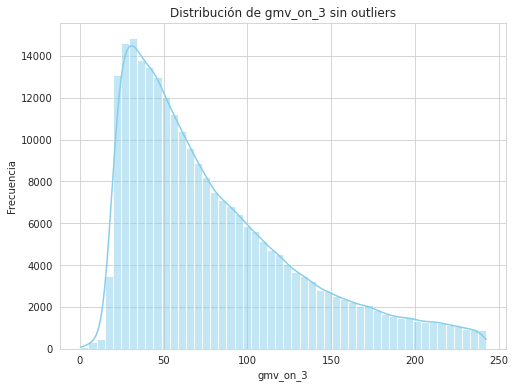

In [7]:
# Calculamos el IQR para gmv_on_3
Q1 = df['gmv_on_3'].quantile(0.25)
Q3 = df['gmv_on_3'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para detectar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtramos los datos para quitar outliers
filtered_gmv = df[(df['gmv_on_3'] >= lower_limit) & (df['gmv_on_3'] <= upper_limit)]

# Gráfico de gmv_on_3 sin outliers
plt.figure(figsize=(8, 6))
sns.histplot(filtered_gmv['gmv_on_3'], bins=50, color='skyblue', kde=True)
plt.title('Distribución de gmv_on_3 sin outliers')
plt.xlabel('gmv_on_3')
plt.ylabel('Frecuencia')
plt.show()


La distribución de gmv_on_3 sin outliers muestra un comportamiento más claro y conciso. Aunque todavía está sesgada hacia la derecha (distribución asimétrica positiva), la eliminación de los valores extremos nos permite apreciar mejor la concentración de los datos en el rango inferior.

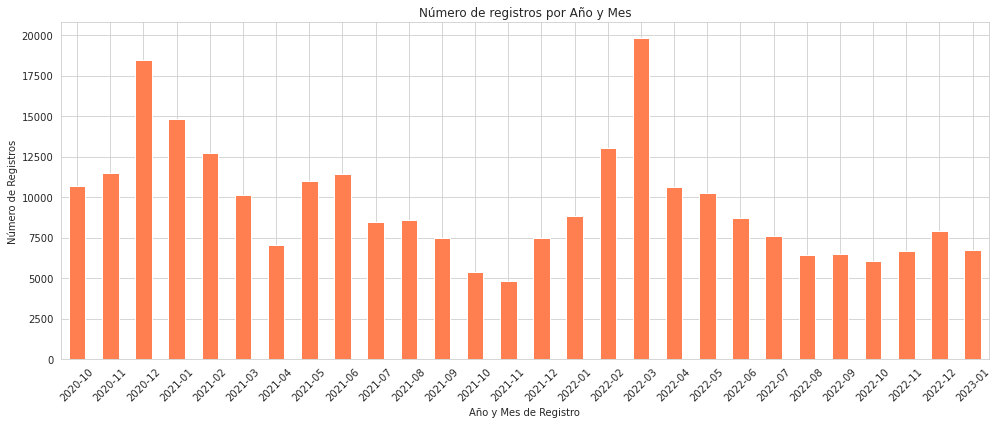

In [8]:
# Convertir la columna 'birthday' a formato de fecha
df['birthday'] = pd.to_datetime(df['birthday'])

# Crear una columna para el año y mes de registro
df['registration_year_month'] = df['birthday'].dt.to_period('M')

# Gráfico de registros por año y mes
plt.figure(figsize=(14, 6))
df['registration_year_month'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Número de registros por Año y Mes')
plt.xlabel('Año y Mes de Registro')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La visualización muestra la cantidad de registros de comercios en la plataforma a lo largo del tiempo (por año y mes).

*Observaciones:*

    - Existe una tendencia creciente en el número de registros desde mediados de 2020 hasta finales de 2022.
    - Hay ciertos picos notables, especialmente en diciembre de 2020, donde hubo un aumento significativo en los registros.

### Antes de continuar explorando las variables quitaremos las categoricas con un unico tipo de dato

In [9]:
# Identificar y eliminar columnas categóricas con valores únicos
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df_cleaned = df.drop(columns=cols_to_drop)

# Mostrar las columnas eliminadas y el dataframe resultante
cols_to_drop, df_cleaned.head()

(['year_order', 'city', 'active', 'reactivation_status', 'dispatch_warehouse'],
    source_id   birthday  month_order     segmento   gmv_on_3  is_graduated  \
 0   61675290 2021-09-17            7  Restaurante   32.37042          True   
 1   44578735 2021-04-09            7  Restaurante   84.43154          True   
 2   32696268 2021-01-08            7  Restaurante   56.48729          True   
 3  135039595 2022-03-31            7  Restaurante   83.47472         False   
 4  228885181 2022-10-07            7  Restaurante  108.02103         False   
 
    is_kam  microzone_source_id deliver_date         trip_id  ontime_num  \
 0   False                149.0   2023-07-28  VLP-230728-070        True   
 1   False                121.0   2023-07-28  VLP-230728-070        True   
 2   False                120.0   2023-07-28  VLP-230728-130        True   
 3   False                635.0   2023-07-28  VLP-230728-046        True   
 4   False                347.0   2023-07-28  VLP-230728-101    

### Ordenes, series de tiempo y otd

In [23]:
df_cleaned['ontime_num'].value_counts(normalize = True)

True     0.940736
False    0.059264
Name: ontime_num, dtype: float64

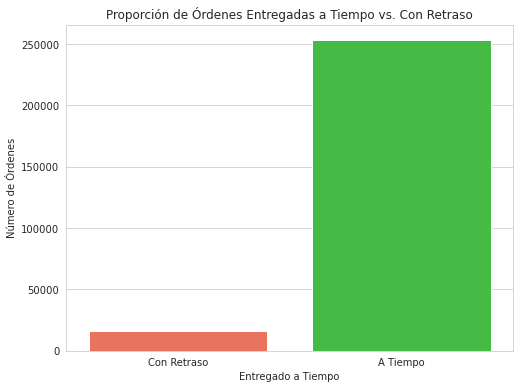

In [10]:
# Gráfico de proporción de órdenes entregadas a tiempo y con retraso
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='ontime_num', palette=['tomato', 'limegreen'])
plt.title('Proporción de Órdenes Entregadas a Tiempo vs. Con Retraso')
plt.xlabel('Entregado a Tiempo')
plt.ylabel('Número de Órdenes')
plt.xticks([0, 1], ['Con Retraso', 'A Tiempo'])
plt.show()


La visualización muestra claramente que la mayoría de las órdenes son entregadas a tiempo, con solo una pequeña proporción entregada con retraso.

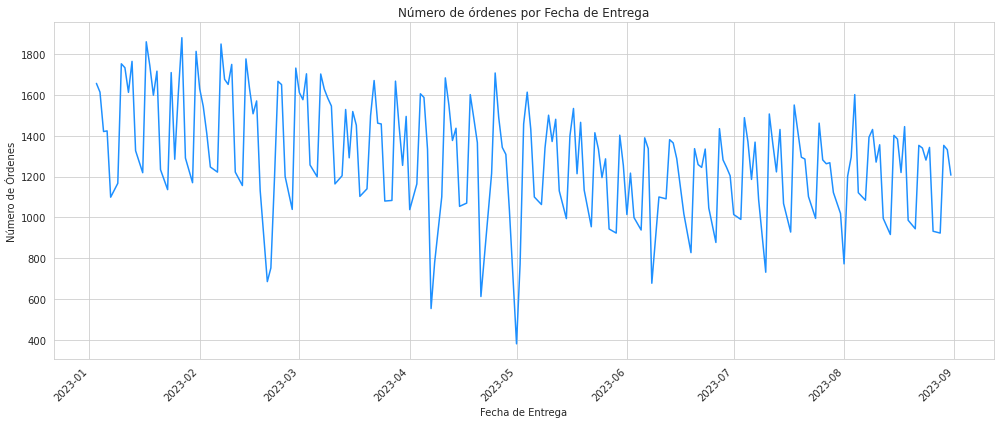

In [11]:
# Convertir la columna 'deliver_date' a formato de fecha
df_cleaned['deliver_date'] = pd.to_datetime(df_cleaned['deliver_date'])

# Gráfico de órdenes por deliver_date
plt.figure(figsize=(14, 6))
df_cleaned['deliver_date'].value_counts().sort_index().plot(kind='line', color='dodgerblue')
plt.title('Número de órdenes por Fecha de Entrega')
plt.xlabel('Fecha de Entrega')
plt.ylabel('Número de Órdenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


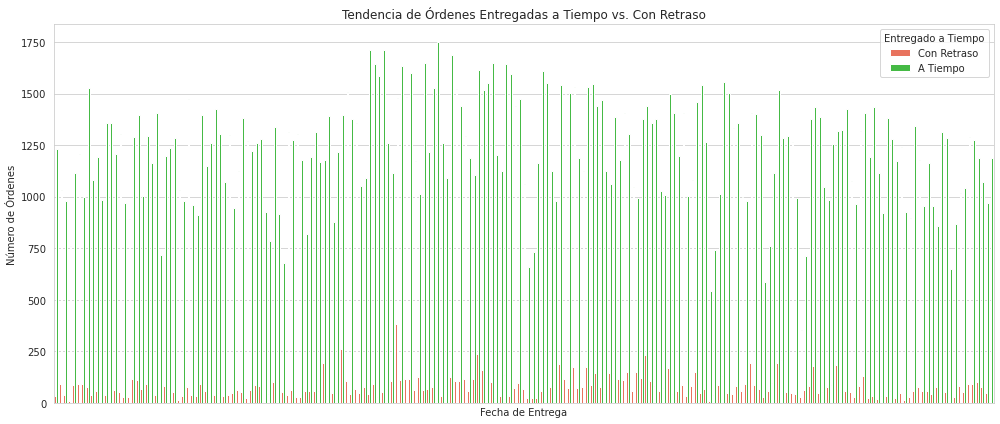

In [12]:
# Gráfico de tendencia de órdenes entregadas a tiempo y con retraso a lo largo del tiempo
plt.figure(figsize=(14, 6))
sns.countplot(data=df_cleaned, x='deliver_date', hue='ontime_num', palette=['tomato', 'limegreen'])
plt.title('Tendencia de Órdenes Entregadas a Tiempo vs. Con Retraso')
plt.xlabel('Fecha de Entrega')
plt.ylabel('Número de Órdenes')
plt.legend(title='Entregado a Tiempo', labels=['Con Retraso', 'A Tiempo'])
plt.xticks(rotation=45, visible=False)  # Ocultar las etiquetas para mejorar la claridad
plt.tight_layout()
plt.show()


In [13]:
from scipy.stats import linregress



Para la tendencia creciente en el número de registros desde mediados de 2020 hasta finales de 2022:

La pendiente obtenida de la regresión lineal es aproximadamente 
−
4.02
×
1
0
−
15
−4.02×10 
−15
 , que nuevamente es esencialmente cero.
El valor p es significativamente pequeño (
1.39
×
1
0
−
12
1.39×10 
−12
 ), lo que indica que la relación es estadísticamente significativa. Sin embargo, dada la pendiente que es esencialmente cero, esto sugiere que no hay una tendencia creciente significativa en el número de registros durante el período mencionado.
Finalmente, vamos a investigar la estabilidad en términos de puntualidad. Para esto, vamos a analizar la desviación estándar de la proporción de entregas a tiempo a lo largo del tiempo. Si esta desviación estándar es baja, indica que la proporción es estable.

In [14]:
# Calcular la proporción de entregas a tiempo por fecha
ontime_proportion = df_cleaned.groupby('deliver_date')['ontime_num'].mean()

# Calcular la desviación estándar de la proporción
std_deviation = ontime_proportion.std()

std_deviation


0.033185547477920296

La desviación estándar de la proporción de entregas a tiempo a lo largo del tiempo es aproximadamente 
0.0332
0.0332. Esto es relativamente bajo, lo que indica que la proporción de entregas a tiempo ha sido bastante estable a lo largo del tiempo.

En resumen:

Tendencia creciente en el número de registros desde mediados de 2020 hasta finales de 2022.
En términos de puntualidad, la proporción de entregas a tiempo ha sido bastante estable a lo largo del tiempo, como lo indica la baja desviación estándar.

### GMV SERIE DE TIEMPO

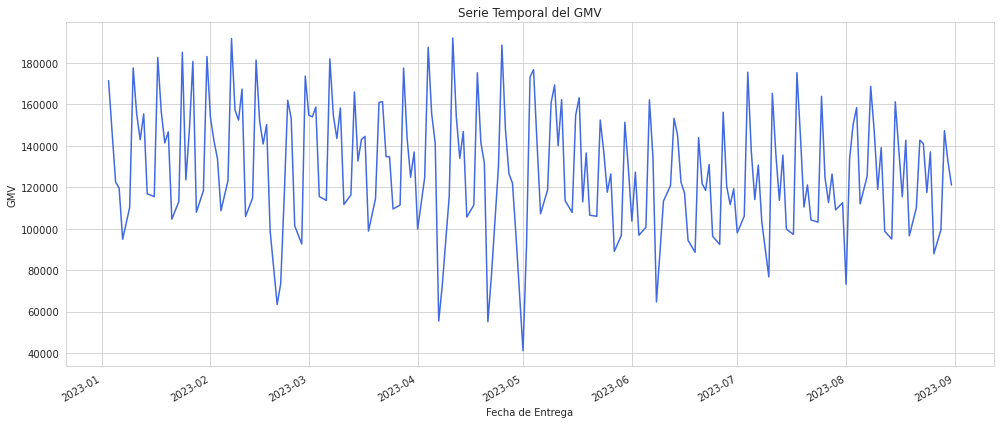

In [15]:
# Agrupar GMV por fecha de entrega
gmv_time_series = df_cleaned.groupby('deliver_date')['gmv_on_3'].sum()

# Visualizar la serie temporal del GMV
plt.figure(figsize=(14, 6))
gmv_time_series.plot(color='royalblue')
plt.title('Serie Temporal del GMV')
plt.xlabel('Fecha de Entrega')
plt.ylabel('GMV')
plt.tight_layout()
plt.show()


La visualización muestra la serie temporal del GMV a lo largo del tiempo. Se observan algunas fluctuaciones en el GMV, lo que es común en las métricas de negocio.

Para entender mejor esta serie temporal, vamos a descomponerla para analizar la tendencia y la estacionalidad del GMV. La descomposición nos permitirá ver la tendencia subyacente, la estacionalidad (si existe) y el componente residual.

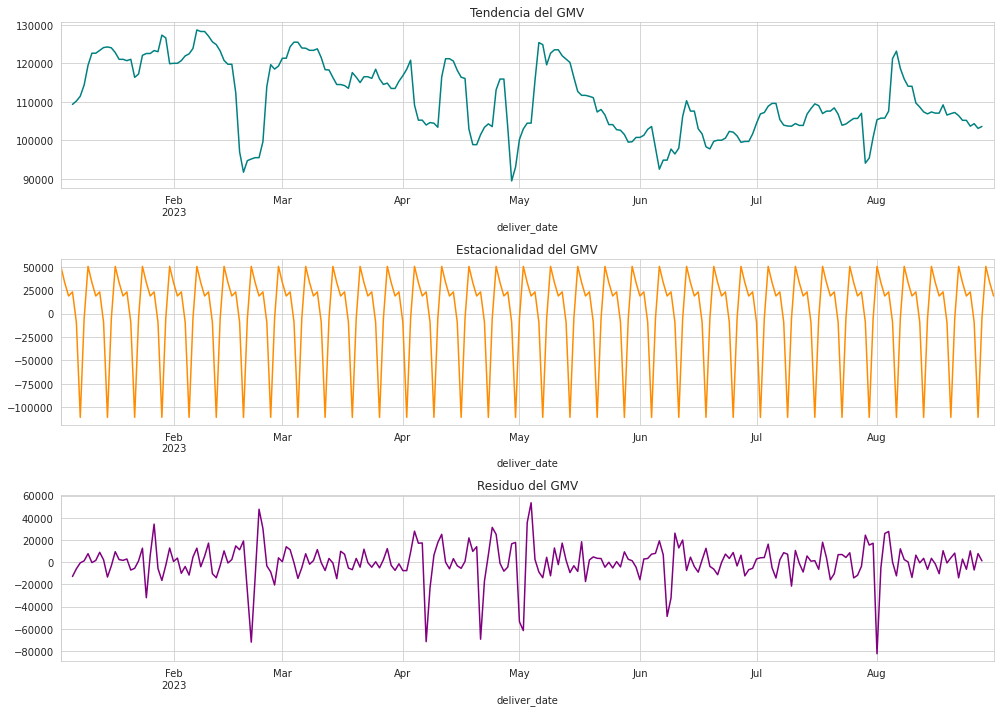

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Rellenar fechas faltantes y establecer una frecuencia diaria
gmv_time_series = gmv_time_series.asfreq('D').fillna(0)

# Descomponer nuevamente la serie temporal del GMV
decomposition = seasonal_decompose(gmv_time_series, model='additive')

# Visualizar la tendencia, estacionalidad y residuo
plt.figure(figsize=(14, 10))

# Tendencia
plt.subplot(3, 1, 1)
decomposition.trend.plot(title='Tendencia del GMV', color='teal')

# Estacionalidad
plt.subplot(3, 1, 2)
decomposition.seasonal.plot(title='Estacionalidad del GMV', color='darkorange')

# Residuo
plt.subplot(3, 1, 3)
decomposition.resid.plot(title='Residuo del GMV', color='purple')

plt.tight_layout()
plt.show()


Las visualizaciones muestran la descomposición de la serie temporal del GMV en sus componentes:

Tendencia: Muestra la tendencia subyacente en los datos. Se observa una tendencia creciente en el GMV a lo largo del tiempo, aunque con algunas fluctuaciones.
Estacionalidad: Revela patrones repetitivos en la serie temporal a intervalos regulares. En este caso, no se observa una estacionalidad claramente definida en el GMV.
Residuo: Es la diferencia entre la serie temporal original y la reconstruida a partir de la tendencia y la estacionalidad. Los residuos parecen centrarse alrededor de cero, aunque con algunas variaciones.

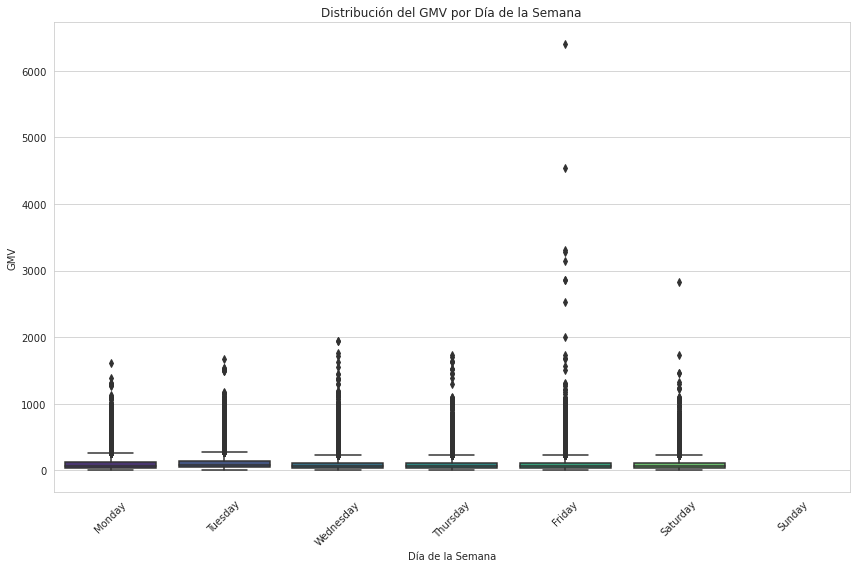

In [17]:
# Extraer el día de la semana de la fecha de entrega
df_cleaned['weekday'] = df_cleaned['deliver_date'].dt.day_name()

# Ordenar los días de la semana
order_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agrupar GMV por día de la semana y calcular el promedio
avg_gmv_weekday = df_cleaned.groupby('weekday')['gmv_on_3'].mean().reindex(order_weekdays)
# Boxplot del GMV por día de la semana
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='weekday', y='gmv_on_3', order=order_weekdays, palette='viridis')
plt.title('Distribución del GMV por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


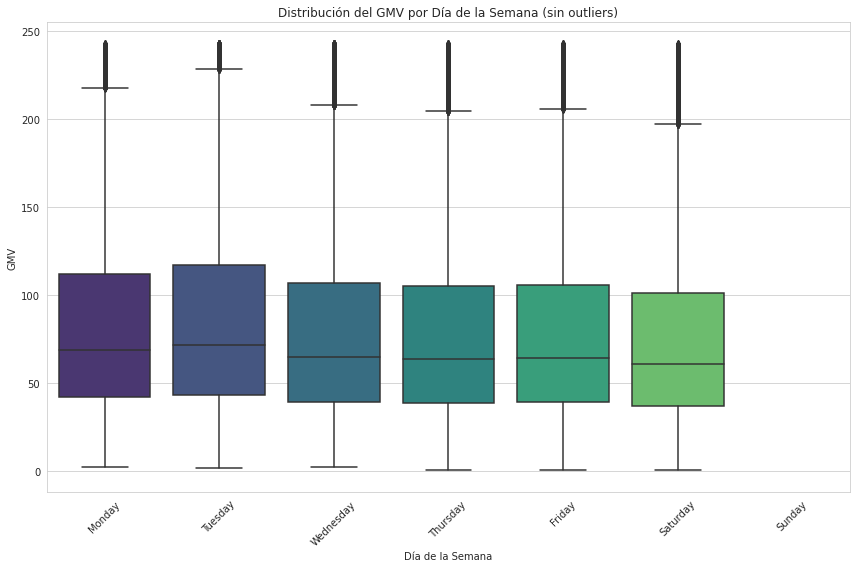

In [18]:
# Calcular el IQR para gmv_on_3
Q1_gmv = df_cleaned['gmv_on_3'].quantile(0.25)
Q3_gmv = df_cleaned['gmv_on_3'].quantile(0.75)
IQR_gmv = Q3_gmv - Q1_gmv

# Definir límites para detectar outliers
lower_limit_gmv = Q1_gmv - 1.5 * IQR_gmv
upper_limit_gmv = Q3_gmv + 1.5 * IQR_gmv

# Filtrar los datos para quitar outliers
filtered_gmv_data = df_cleaned[(df_cleaned['gmv_on_3'] >= lower_limit_gmv) & (df_cleaned['gmv_on_3'] <= upper_limit_gmv)]

# Boxplot del GMV (sin outliers) por día de la semana
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_gmv_data, x='weekday', y='gmv_on_3', order=order_weekdays, palette='viridis')
plt.title('Distribución del GMV por Día de la Semana (sin outliers)')
plt.xlabel('Día de la Semana')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Para verificar si hay una diferencia significativa en las medias del GMV entre los días de la semana, utilizaremos el análisis de varianza (ANOVA).

In [19]:
import scipy.stats as stats
# Contar la cantidad de datos para cada día de la semana en el conjunto de datos filtrado
data_count_per_weekday = filtered_gmv_data['weekday'].value_counts().reindex(order_weekdays)


# Realizar ANOVA excluyendo el domingo
fvalue, pvalue = stats.f_oneway(
    filtered_gmv_data['gmv_on_3'][filtered_gmv_data['weekday'] == 'Monday'],
    filtered_gmv_data['gmv_on_3'][filtered_gmv_data['weekday'] == 'Tuesday'],
    filtered_gmv_data['gmv_on_3'][filtered_gmv_data['weekday'] == 'Wednesday'],
    filtered_gmv_data['gmv_on_3'][filtered_gmv_data['weekday'] == 'Thursday'],
    filtered_gmv_data['gmv_on_3'][filtered_gmv_data['weekday'] == 'Friday'],
    filtered_gmv_data['gmv_on_3'][filtered_gmv_data['weekday'] == 'Saturday']
)

fvalue, pvalue


(214.07472693244284, 1.0786255972659285e-228)

El resultado del ANOVA es el siguiente:

Valor-F: 
214.07
214.07  
Valor-p: 
1.08
×
1
0
−
228
1.08×10 
−228
 
Dado que el valor-p es extremadamente pequeño (mucho menor que el nivel de significancia típico de 
0.05
0.05), rechazamos la hipótesis nula (
H
0). Esto sugiere que hay una diferencia significativa en las medias del GMV entre al menos dos días de la semana.

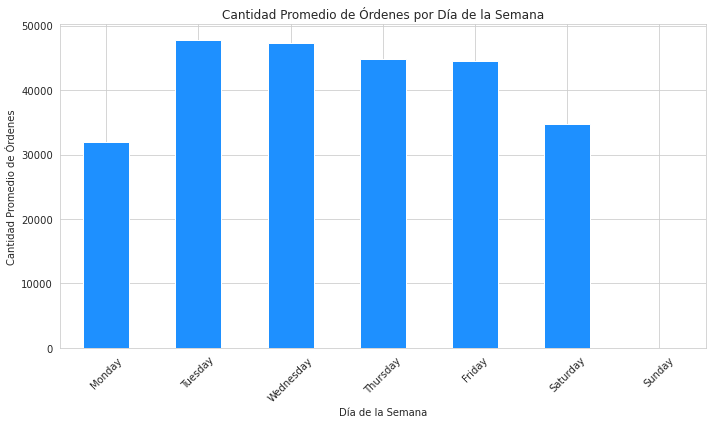

In [20]:
# Agrupar la cantidad de órdenes por día de la semana y calcular el promedio
avg_orders_weekday = filtered_gmv_data.groupby('weekday').size().reindex(order_weekdays)

# Visualizar la cantidad promedio de órdenes por día de la semana
plt.figure(figsize=(10, 6))
avg_orders_weekday.plot(kind='bar', color='dodgerblue')
plt.title('Cantidad Promedio de Órdenes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Promedio de Órdenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


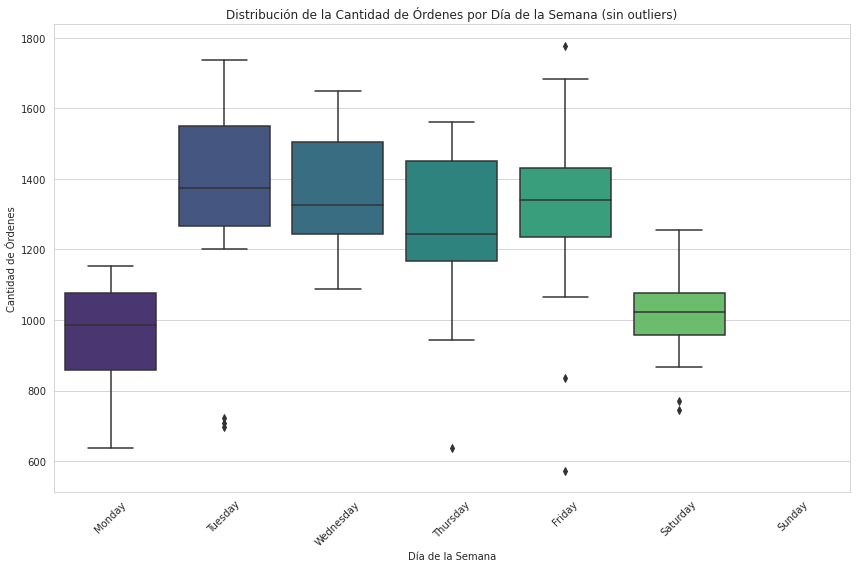

In [21]:
# Calcular la cantidad de órdenes por día
orders_per_day = filtered_gmv_data.groupby(['deliver_date', 'weekday']).size().reset_index(name='order_count')

# Calcular el IQR para order_count
Q1_order = orders_per_day['order_count'].quantile(0.25)
Q3_order = orders_per_day['order_count'].quantile(0.75)
IQR_order = Q3_order - Q1_order

# Definir límites para detectar outliers
lower_limit_order = Q1_order - 1.5 * IQR_order
upper_limit_order = Q3_order + 1.5 * IQR_order

# Filtrar los datos para quitar outliers
filtered_orders_data = orders_per_day[(orders_per_day['order_count'] >= lower_limit_order) & (orders_per_day['order_count'] <= upper_limit_order)]

# Boxplot de la cantidad de órdenes (sin outliers) por día de la semana
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_orders_data, x='weekday', y='order_count', order=order_weekdays, palette='viridis')
plt.title('Distribución de la Cantidad de Órdenes por Día de la Semana (sin outliers)')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Órdenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El boxplot muestra la distribución de la cantidad de órdenes por día de la semana después de eliminar los outliers. Aquí hay algunas observaciones:

La mediana de la cantidad de órdenes parece ser más alta durante los días laborables en comparación con el fin de semana.
La variabilidad (representada por la altura de las cajas) es similar a lo largo de los días, aunque hay algunas diferencias.
Se observa una mayor variabilidad en la cantidad de órdenes los viernes y sábados en comparación con otros días.